# 1. Gere manualmente ("no braço") um dataset (array) com 10 elementos inteiros, tendo como média o valor 3 e como desvio padrão um valor próximo de 2. Desenhe o histograma para os dados gerados.

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
X = np.array([0, 1, 1, 2, 3, 3, 4, 5, 5, 6])

In [3]:
np.min(X), np.max(X), np.mean(X), np.std(X)

(0, 6, 3.0, 1.8973665961010275)

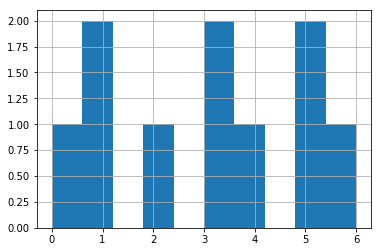

In [4]:
plt.grid();
plt.hist(X);

# 2. Gere dados randômicos e desenhe o histograma para uma distribuição normal contendo 5000 pontos, que tem como média o valor 60 e como desvio padrão o valor 10.

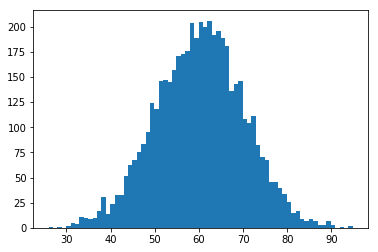

In [5]:
X2 = np.random.normal(loc=60,scale=10,size=5000)
plt.hist(X2, bins=69);

# 3. Gere dados randômicos e desenhe o histograma para 2 distribuições escolhidas por você (exceto a dist. normal/gaussiana):

## Geometric

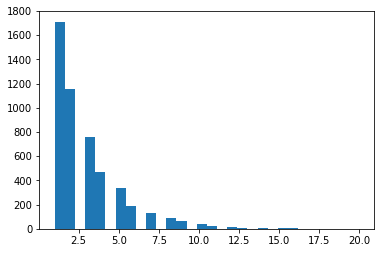

In [6]:
X3_1 = np.random.geometric(p=0.35, size=5000)
plt.hist(X3_1, bins=30);

## Binomial

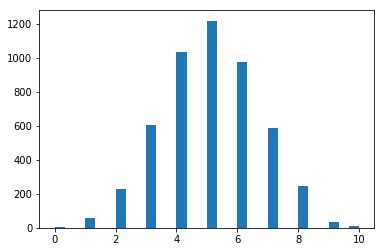

In [7]:
X3_2 = np.random.binomial(10, 0.5, 5000)
plt.hist(X3_2, bins=30);

# 4. Altere os parâmetros do Gradiente Descendente do notebook 04-Gradiente Descendente.ipynb, para que a diferença entre o valor da métrica de erro do Gradiente Descendente e o valor da métrica de erro da Regressão Linear do Scikit Learn seja menor do que 0.01. Obtenha os coeficientes da regressão linear e o valor do erro. Dica: aumentar muito o número de iterações do Gradiente Descendente.
## O que ocorre quando você aumenta o valor de learning_rate para 0.01?
## Que valores de parâmetros podem ser usados com sucesso para obter um valor satisfatório para a métrica de erro ao usar um valor de learning_rate igual a 0.01?
### Os parâmetros deve ser tais que nenhum warning deve ocorrer durante a execução do gradiente descendente.

In [8]:
from sklearn import linear_model

In [9]:
points = np.genfromtxt("datasets/data.csv", delimiter=",")

### Erro
$$ Error_{\beta_0, \beta_1} = \frac{1}{N} \sum_{i=1}^{N}{(y_i - (\beta_1 x_i + \beta_0))^2}  $$
### Derivada Parcial
$$ \frac{\partial}{\partial \beta_1} = \frac{2}{N} \sum_{i=1}^{N} -x_i(y_i-(\beta_1x_i + \beta_0))  $$$$ \frac{\partial}{\partial \beta_0} = \frac{2}{N} \sum_{i=1}^{N} -(y_i-(\beta_1x_i + \beta_0))  $$

### Definindo funções auxiliares

In [10]:
# y = b0 + b1 * x
# b1 é a inclinação, b0 é y-intercept
def compute_error_for_line_given_points(b0, b1, x, y):
    totalError = np.sum((y - (b1 * x + b0)) ** 2)
    return totalError / float(len(y))

def step_gradient(b0_current, b1_current, x, y, learning_rate):
    N = float(len(y))
    b0_gradient = 2/N * np.sum(-(y - ((b1_current * x) + b0_current)))
    b1_gradient = 2/N * np.sum(-x * (y - ((b1_current * x) + b0_current)))
    new_b0 = b0_current - (learning_rate * b0_gradient)
    new_b1 = b1_current - (learning_rate * b1_gradient)
    return new_b0, new_b1

def gradient_descent_runner(x, y, b0, b1, learning_rate, num_iterations):
    for _ in range(num_iterations):
        b0, b1 = step_gradient(b0, b1, x, y, learning_rate)
    return b0, b1

def run(x, y, initial_b0, initial_b1, learning_rate, num_iterations):
    print("Inicia com b0 = {}, b1 = {}, error = {}".format(initial_b0, initial_b1, 
       compute_error_for_line_given_points(initial_b0, initial_b1, x, y)))  
    print("Executando...")
    b0, b1 = gradient_descent_runner(x, y, initial_b0, initial_b1, learning_rate, num_iterations)
    error_grad = compute_error_for_line_given_points(b0, b1, x, y)
    print("Após {} iterações, obtemos b0 = {}, b1 = {}, error = {}".format(num_iterations, 
       b0, b1, error_grad))
    return error_grad

### Métrica de erro do Gradiente descendente

In [11]:
%%time
x = points[:, 0]
y = points[:, 1]
learning_rate = 0.0001
initial_b0 = 0 # y-intercept inicial
initial_b1 = 0 # inclinação inicial
num_iterations = 365000
error_grad = run(x, y, initial_b0, initial_b1, learning_rate, num_iterations)

Inicia com b0 = 0, b1 = 0, error = 5565.107834483214
Executando...
Após 365000 iterações, obtemos b0 = 7.4845368500123595, b1 = 1.3323858140550773, error = 110.26706817445053
CPU times: user 8.23 s, sys: 28.2 ms, total: 8.26 s
Wall time: 8.27 s


### Métrica de erro da Regressão Linear

In [12]:
%%time
model = linear_model.LinearRegression()
X = [ [i] for i in x ] 
model.fit(X, y)
b0, b1 = model.intercept_, model.coef_
y_pred = model.predict(X)
error_regre_lin = compute_error_for_line_given_points(b0, b1, x, y)
# Obtendo os coeficientes e o erro da regressão linear
print("b0 = {}, b1 = {}, error = {}".format(b0, b1, error_regre_lin))

b0 = 7.991020982270399, b1 = [ 1.32243102], error = 110.25738346621316
CPU times: user 18.4 ms, sys: 7.78 ms, total: 26.2 ms
Wall time: 142 ms


In [13]:
# Calculando a diferença
print("Diferença = {}".format(error_grad - error_regre_lin))

Diferença = 0.009684708237372774


### Modificando o valor do learning_rate para 0,01

In [14]:
%%time
learning_rate = 0.01
run(x, y, initial_b0, initial_b1, learning_rate, num_iterations)

Inicia com b0 = 0, b1 = 0, error = 5565.107834483214
Executando...


/home/rodmds/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


Após 365000 iterações, obtemos b0 = nan, b1 = nan, error = nan
CPU times: user 8.49 s, sys: 44.8 ms, total: 8.54 s
Wall time: 8.54 s


### Modificando parâmetros para learning_rate 0,01 sem erro

In [15]:
%%time
learning_rate = 0.01
num_iterations = 90
error_grad = run(x, y, initial_b0, initial_b1, learning_rate, num_iterations)

Inicia com b0 = 0, b1 = 0, error = 5565.107834483214
Executando...
Após 90 iterações, obtemos b0 = -2.8313589796082146e+150, b1 = -1.4405509394642438e+152, error = inf
CPU times: user 4.07 ms, sys: 2 µs, total: 4.08 ms
Wall time: 3.88 ms


#### Foi necessário reduzir drasticamente o número de iterações para que o erro desaparecesse.

# 5. Use o gradiente descendente com boa precisão para:
## Criar um modelo linear a partir dos seguintes dados:

https://www.kdnuggets.com/wp-content/uploads/historical-housing-data.png

## Predizer o preço em Dólares de uma casa com área de 100 m2 (converta adequadamente as unidades de medida). 


In [16]:
# Criando array com os dados da imagem acima:
points2 = np.array([[1400, 245.000], [1600, 312.000], [1700, 279.000], [1875, 308.000], [1100, 199.000], 
                   [1550, 219.000], [2350, 405.000], [2450, 324.000], [1425, 319.000], [1700, 255.000]])

In [17]:
%%time
# Criando o modelo
x = points2[:, 0]
y = points2[:, 1]
learning_rate = 0.0000000001
initial_b0 = 0 # y-intercept inicial
initial_b1 = 0 # inclinação inicial
num_iterations = 10000000
b0_2, b1_2 = gradient_descent_runner(x, y, initial_b0, initial_b1, learning_rate, num_iterations)

print("b0 = {} e b1 = {}".format(b0_2, b1_2))
print("A função linear que define o modelo é: y = {} * x + {}".format(b1_2,b0_2))

b0 = 0.010056678929743863 e b1 = 0.16414419027833546
A função linear que define o modelo é: y = 0.16414419027833546 * x + 0.010056678929743863
CPU times: user 3min 31s, sys: 329 ms, total: 3min 32s
Wall time: 3min 32s


In [18]:
def transformar_em_ft2(tamanho_em_m2):
    return tamanho_em_m2 / 0.092903

def valor_da_casa(tamanho, b0, b1):
    return b1 * transformar_em_ft2(tamanho) + b0

In [19]:
print("100m² se torna {}ft²".format(transformar_em_ft2(100)))
print("O valor da casa de 100m² custa {}$".format(round(valor_da_casa(100, b0_2, b1_2), 2)))

100m² se torna 1076.3915051182416ft²
O valor da casa de 100m² custa 176.69$
